# 1. 準確率 (Accuracy)

## 1-1. 預測信用卡詐騙

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X, y = df.drop(["Time","Amount","Class"], axis = 1), df["Class"]

In [4]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.999283727985169

In [6]:
# 取得混淆矩陣的4個格子
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(71072, 10, 41, 79)

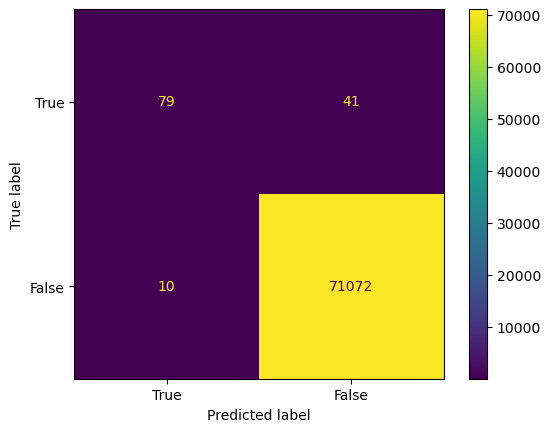

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [1,0],
                                        display_labels = ["True","False"])

In [8]:
print(f'準確率(Accuracy) = {(tn + tp) / (tn + fp + fn + tp)}')
print(f'精確率(Precision) = {(tp) / (fp + tp)}')
print(f'召回率(Recall) = {(tp) / (fn + tp)}')
print(f'F1 score = {(2 * tp) / (2 * tp + fp + fn)}')

準確率(Accuracy) = 0.999283727985169
精確率(Precision) = 0.8876404494382022
召回率(Recall) = 0.6583333333333333
F1 score = 0.7559808612440191


# 2. ROC 曲線繪製


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("./roc_test_data.csv")
df.head()

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1


In [11]:
df.sort_values(by="predict", ascending = False)

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1
16,0.71,1
15,0.65,1
10,0.56,1
11,0.48,0
5,0.44,1


In [12]:
df.actual.value_counts()

actual
1    11
0     7
Name: count, dtype: int64

# 3. Scikit-Learn 作法

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(df["actual"], df["predict"])
print(fpr, tpr, threshold)
# fpr 假陽率、tpr 真陽率、recall 召回率

[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ] [0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ] [ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


Text(0.5, 0, 'FP')

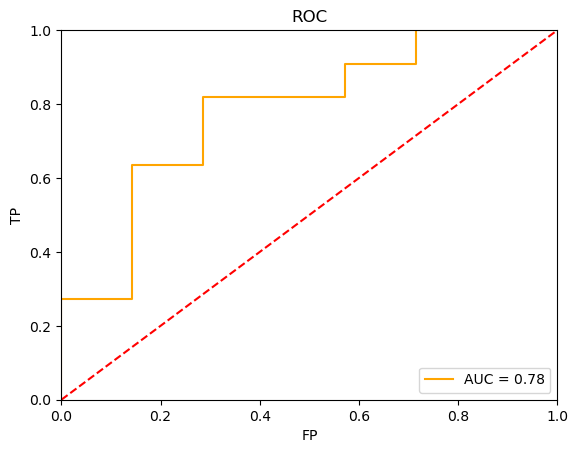

In [14]:
auc1 = auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TP')
plt.xlabel('FP')

# 4. MinMaxScaler

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

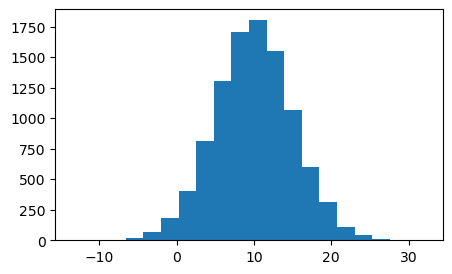

In [16]:
# 常態分配
# np.random.normal(平均數,標準差,數量)
data = np.random.normal(10,5,10000)
plt.figure(figsize = (5,3))
plt.hist(data,20)
plt.show()

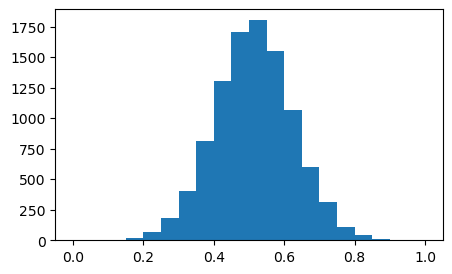

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize = (5,3))
plt.hist(data_new,20)
plt.show()

# 5. StandardScaler

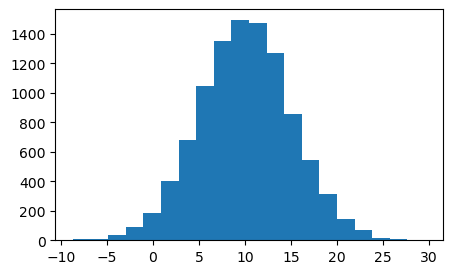

In [18]:
# 常態分配
# np.random.normal(平均數,標準差,數量)
data = np.random.normal(10,5,10000)
plt.figure(figsize = (5,3))
plt.hist(data,20)
plt.show()

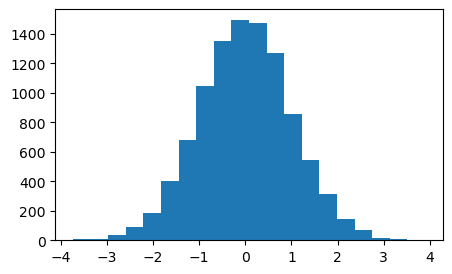

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize = (5,3))
plt.hist(data_new,20)
plt.show()

# 6. 多重共線性 (Multicollinearity)

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

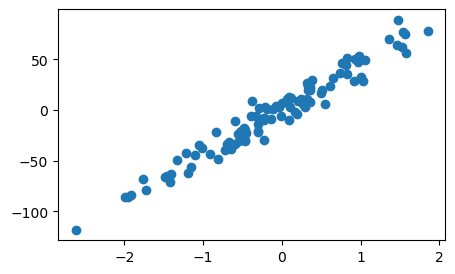

In [21]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 100, n_features = 1, noise = 10, random_state = 42)
plt.figure(figsize = (5,3))
plt.scatter(X, y)
plt.show()

# 7. 迴歸

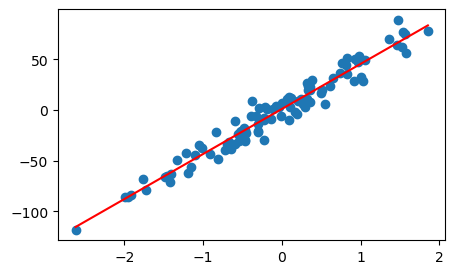

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
X_pred = np.linspace(np.min(X.reshape(-1)), np.max(X.reshape(-1)),20)
y_pred = X_pred * model.coef_[0] + model.intercept_
plt.figure(figsize = (5,3))
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red')
plt.show()

In [23]:
model.coef_

array([44.43716999])

In [24]:
X2 = X.copy()
X_new = np.hstack((X, X2))
print(X_new.shape)
print(X_new)

(100, 2)
[[ 0.93128012  0.93128012]
 [ 0.08704707  0.08704707]
 [-1.05771093 -1.05771093]
 [ 0.31424733  0.31424733]
 [-0.47917424 -0.47917424]
 [ 0.64768854  0.64768854]
 [-0.46341769 -0.46341769]
 [ 0.54256004  0.54256004]
 [ 0.61167629  0.61167629]
 [ 1.0035329   1.0035329 ]
 [ 0.8219025   0.8219025 ]
 [ 1.53803657  1.53803657]
 [ 0.73846658  0.73846658]
 [-0.21967189 -0.21967189]
 [-0.8084936  -0.8084936 ]
 [ 0.09176078  0.09176078]
 [-1.95967012 -1.95967012]
 [ 0.51326743  0.51326743]
 [ 1.03099952  1.03099952]
 [-2.6197451  -2.6197451 ]
 [ 0.49671415  0.49671415]
 [ 0.09707755  0.09707755]
 [-0.46572975 -0.46572975]
 [ 0.91540212  0.91540212]
 [ 1.56464366  1.56464366]
 [ 1.46564877  1.46564877]
 [-0.60063869 -0.60063869]
 [-0.03582604 -0.03582604]
 [-0.60170661 -0.60170661]
 [-1.19620662 -1.19620662]
 [ 0.35711257  0.35711257]
 [ 0.37569802  0.37569802]
 [ 0.26105527  0.26105527]
 [-0.5297602  -0.5297602 ]
 [-0.90802408 -0.90802408]
 [ 0.19686124  0.19686124]
 [-0.29900735 -0.29

In [25]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_new, y)
model2.coef_

array([22.218585, 22.218585])